In [2]:
import os
import pathlib
import pandas as pd
import numpy as np
from skimage import io
import sklearn.preprocessing as preproc
import matplotlib.pyplot as plt
import scipy.linalg as lng
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sys import getsizeof
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import gc

%matplotlib inline
%run my_functions.ipynb

## Paths

In [2]:
data_path = '../data/Faces/'
labels_path = '../data/labels.csv'
result_path = '../results'

## Nr of data, Labels etc

In [3]:
labels = pd.read_csv(labels_path)
labels_columns = ['age', 'gender', 'race']
labels = pd.DataFrame(data=labels.values, columns=labels_columns)

dirs = os.listdir(data_path)
no_of_images = len(dirs)

# Open one image to get dimensions
k = no_of_images
img_rnd = io.imread(data_path+f'{k-1}.jpg')
h,w,_ = img_rnd.shape
del img_rnd

batch_ratio = 10
bathc_len = no_of_images//batch_ratio
current_index=0

## Read Data(Grey)

In [4]:
## Create the binary. Open it in append mode

X = np.empty((k,h*w))


for i in tqdm(range(k)):
    X[i,:] = io.imread(data_path+f'{i}.jpg',as_gray=True).reshape(1,-1)
print(f'Size as float: {convert_size(X.nbytes)}')
X = X.astype(int)
print(f'Size as int: {convert_size(X.nbytes)}')

#np.savetxt(os.path.join(result_path, 'pictures.csv'), X, delimiter=",")

100%|████████████████████████████████████████████| 23705/23705 [00:21<00:00, 1099.65it/s]


Size as float: 7.06 GB
Size as int: 7.06 GB


In [5]:
labels = labels[:k]
#labels['race'].values

In [43]:
Y = np.empty((k,h*w))


for i in tqdm(range(k)):
    Y[i,:] = io.imread(data_path+f'{i}.jpg',as_gray=True).reshape(1,-1)
print(f'Size as float: {convert_size(X.nbytes)}')

print(f'Size as int: {convert_size(X.nbytes)}')

100%|█████████████████████████████████████████████| 23705/23705 [00:25<00:00, 933.32it/s]

Size as float: 7.06 GB
Size as int: 7.06 GB


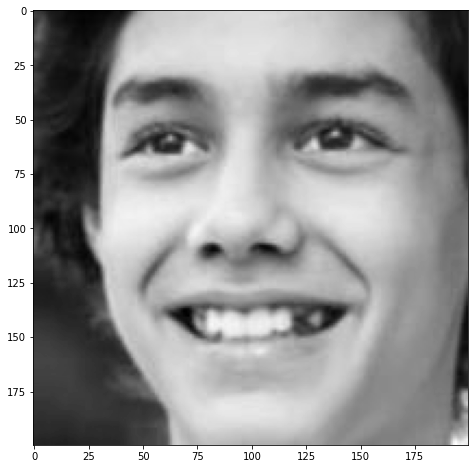

In [44]:
plt.imshow(Y[100].reshape(200,200), cmap=plt.cm.gray,
                   )

In [46]:
Y.dtype

dtype('float64')

## PCA (Grey)

In [6]:
# test_size: what proportion of original data is used for test set
#train_img, test_img, train_lbl, test_lbl = train_test_split( X, labels['race'].values, test_size=1/7.0, random_state=0)


In [8]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X)

# Apply transform to both the training set and the test set.
X = scaler.transform(X)
#test_img = scaler.transform(test_img)
del scaler

In [9]:
gc.collect()

94

In [10]:
# Make an instance of the Model
pca = PCA()

pca.fit(X)

PCA()

In [14]:
pca.n_components_

23705

In [1]:
plt.rcParams["figure.figsize"] = (16,8)

fig, ax = plt.subplots()
xi = np.arange(1, 700, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y[:699], marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 700, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
plt.xticks(rotation=-45)

ax.grid(axis='x')
plt.show()

NameError: name 'plt' is not defined

In [21]:
y[700]

0.984870800803566

In [106]:
# Make an instance of the Model
#pca = PCA(0.95)

#pca.fit(train_img)
#pca.n_components_

7

### Apply the mapping (transform) to both the training set and the test set

In [57]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

### Apply Logistic Regression to the Transformed Data

In [67]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)


# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between digits and labels
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=1000)

In [68]:
# Predict the labels of new data (new images)
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))


array([0])